# Machine Learning Notebook 5: Support Vector Machine(SVM) Regression

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression.<br>
Though we say regression problems as well its best suited for classification.<br> The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.<br> The dimension of the hyperplane depends upon the number of features.<br> If the number of input features is two, then the hyperplane is just a line.<br> If the number of input features is three, then the hyperplane becomes a 2-D plane.<br> It becomes difficult to imagine when the number of features exceeds three. 

Let’s consider two independent variables x1, x2 and one dependent variable which is either a blue circle or a red circle.
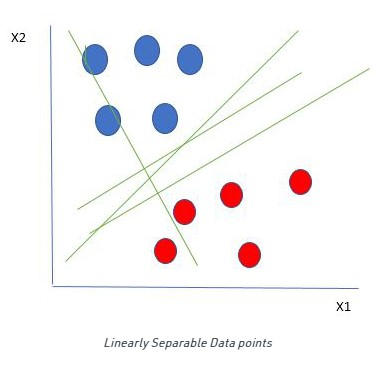
From the figure above its very clear that there are multiple lines (our hyperplane here is a line because we are considering only two input features x1, x2) that segregates our data points or does a classification between red and blue circles.<br> So how do we choose the best line or in general the best hyperplane that segregates our data points. ??

<b>Selecting the best hyper-plane:</b>
One reasonable choice as the best hyperplane is the one that represents the largest separation or margin between the two classes. 
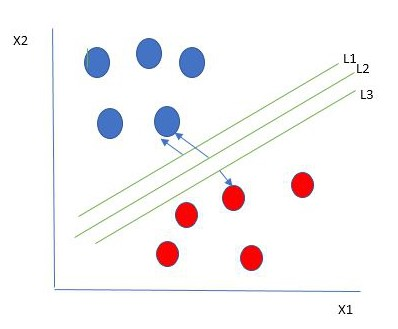
So we choose the hyperplane whose distance from it to the nearest data point on each side is maximized.<br>
If such a hyperplane exists it is known as the maximum-margin hyperplane/hard margin.<br>
So from the above figure, we choose L2.

Text and Images Source URL: https://www.geeksforgeeks.org/support-vector-machine-algorithm/

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
df = pd.read_csv('C:\\Users\krane\Desktop\datasets\Position_Salaries.csv')

### Basic sanity checks on Dataset

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

### Some notes on Feature scaling application

It need not be applied to Dummy variables resulting from One Hot encoding.<br>
Need not be applied to dependent variable taking binary values like 0 & 1.<br>
If features are in a certain range similar to each other, then they don't need feature scaling.<br>
When certain features take very high values compared to other features in the same dataset, then we need to apply feature scaling, to put all the features and dependent variable in same range/scale.<br>
Important: Feature Scaling needs to be applied after doing the Train and Test Split.<br>

### Splitting features and target variable

In [10]:
x = df.iloc[:,1:-1].values #second row only
y = df.iloc[:,-1].values #last row only

In [11]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


<b>Note:</b> x is a 2D array(notice double [[]] brackets ),  y is a 1D horizontal array.
For feature scaling, we need to convert y to a 2D array. 

In [13]:
y = y.reshape(len(y),1) #reshape(no. of rows, no. of columns)

In [14]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


y is now a 2D array, observe double [[]] brackets.

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [17]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [18]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Train dataset on Support Vector Regression(SVR) model

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') #rbf is Radial Basis Function it is a go-to kernel for SVM model
regressor.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a result salary for Level 6.5

1. regressor.predict([[6.5]]) <br>
Above code would be expected but it won't work as both x and y were scaled.<br>
We need to scale 6.5 to do prediction.<br>

2. regressor.predict(sc_x.transform[[6.5]]) <br>
Even when we use this method, the answer we will be getting is that of a scaled value of y, which is not of use to us.<br>
We will have to reverse the scaling of variable y.

3. As the output of above code expression would be a scaled value of y, we will apply reverse scaing to it as below


In [22]:
sc_y.inverse_transform(regressor.predict(sc_x.transform[[6.5]]))

TypeError: 'method' object is not subscriptable

In [24]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [25]:
# reshape was added after observing above error, it has been maintained for learning.

The predicted salary for Level 6.5 is 170,370 seems reasonable as the salary for Level 6 is 150,000 as per our dataset.

### Visualizing the SVR results

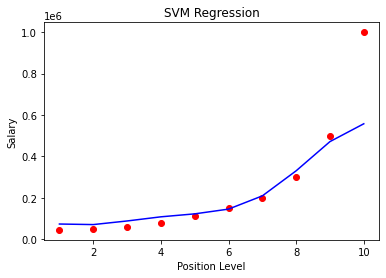

In [29]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.title('SVM Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<b>Please Note</b><br>
SVR Model is suitable for linear as well as non-linear data.<br>
We can choose different kernels available in SVM based on the type of problem we need to solve and the relevant data available at that time.

### <center>The End